In [127]:
import crypto_utils as crypu
import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import calendar
import numpy as np
import pandas as pd
from scipy import stats
import sys
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
%matplotlib inline

from crypto_utils import fmt_date, print_update

In [152]:
#btc
btc = pd.read_csv("./data/btc.csv")
btc.head()

,date,open,high,low,close,volume,mkt_cap
0,2018-04-03,7102.26,7530.94,7072.49,7456.11,5499700000,120415000000
1,2018-04-02,6844.86,7135.47,6816.58,7083.80,4333440000,116037000000
2,2018-04-01,7003.06,7060.95,6526.87,6844.23,4532100000,118705000000
3,2018-03-31,6892.48,7207.85,6863.52,6973.53,4553270000,116820000000
4,2018-03-30,7171.45,7276.66,6683.93,6890.52,6289510000,121534000000


In [153]:
btc = btc[['date','close']]
#btc.columns = ['date','BTC']
btc.rename(columns={'close': 'BTC'}, inplace=True)
btc.head()

,date,BTC
0,2018-04-03,7456.11
1,2018-04-02,7083.80
2,2018-04-01,6844.23
3,2018-03-31,6973.53
4,2018-03-30,6890.52


In [11]:
x = pd.read_csv("./data/file_info.csv", encoding='ISO-8859-1')
f = x['id']
f = "./data/" + f + ".csv"
p = btc.copy()

In [12]:
for i in f:
    x = pd.read_csv(i)
    p = pd.merge(p,x,how='left')

In [146]:
p.describe(include='all')
p.columns

Index(['date', 'btc', 'DCOILWTICO', 'DCOILBRENTEU', 'DHHNGSP',
       'GOLDPMGBD228NLBM', 'DHOILNYH', 'DTWEXB', 'DEXUSEU', 'DEXUSUK',
       'DEXCHUS', 'T10YIE', 'DAAA', 'DTB1YR', 'T5YIE', 'RU2000PR', 'NASDAQ100',
       'NASDAQCOM', 'DJIA', 'SP500', 'VIXCLS', 'OVXCLS', 'VXOCLS', 'GVZCLS',
       'VXDCLS', 'VXNCLS', 'VXSLVCLS', 'VXGSCLS', 'EVZCLS', 'VXFXICLS',
       'VXEWZCLS', 'NIKKEI225', 'day'],
      dtype='object')

Text(0.5,1,'Missing Values among observations')

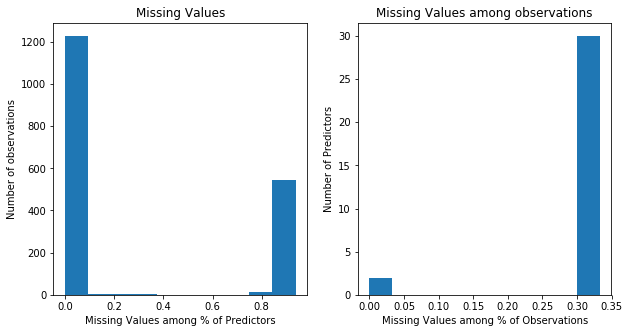

In [23]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
k = 1 - p.apply(lambda x: x.count(), axis=1)/p.shape[1]
ax1.hist(k)
ax1.set_xlabel('Missing Values among % of Predictors')
ax1.set_ylabel('Number of observations')
ax1.set_title('Missing Values')
k = 1 - p.apply(lambda x: x.count(), axis=0)/p.shape[0]
plt.hist(k)
ax2.set_xlabel('Missing Values among % of Observations')
ax2.set_ylabel('Number of Predictors')
ax2.set_title('Missing Values among observations')

In [30]:
p['date'] = pd.to_datetime(p['date'])
p['day'] = p['date'].dt.weekday_name
#Remove Saturday and Sunday Observations
p_org = p.copy()
p = p[~ p.day.isin(['Saturday','Sunday'])]
p.drop(['day'], axis=1)

,date,btc,DCOILWTICO,DCOILBRENTEU,DHHNGSP,GOLDPMGBD228NLBM,DHOILNYH,DTWEXB,DEXUSEU,DEXUSUK,...,GVZCLS,VXDCLS,VXNCLS,VXSLVCLS,VXGSCLS,EVZCLS,VXFXICLS,VXEWZCLS,NIKKEI225,day
0,2018-04-03,7456.11,NaN,NaN,NaN,1333.45,NaN,NaN,NaN,NaN,...,11.80,22.33,28.05,19.30,33.64,7.34,28.79,33.42,NaN,Tuesday
1,2018-04-02,7083.80,63.05,69.02,2.75,NaN,1.941,NaN,NaN,NaN,...,12.86,24.74,29.92,20.02,34.03,7.18,31.55,32.94,NaN,Monday
4,2018-03-30,6890.52,NaN,NaN,NaN,NaN,NaN,117.5686,1.2320,1.4027,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday
5,2018-03-29,7165.70,64.87,69.02,2.81,1323.85,1.970,117.7820,1.2297,1.4029,...,11.06,21.53,26.68,18.40,29.66,7.05,26.85,30.28,NaN,Thursday
6,2018-03-28,7954.48,64.30,68.13,2.64,1332.45,1.965,117.7168,1.2351,1.4110,...,11.74,24.35,30.19,18.41,33.16,7.27,30.39,32.13,NaN,Wednesday


Text(0.5,1,'Missing Values among observations')

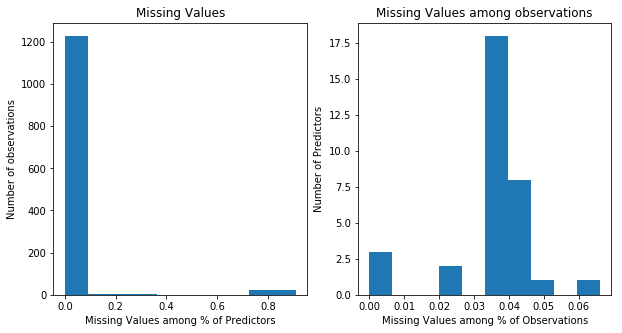

In [31]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
k = 1 - p.apply(lambda x: x.count(), axis=1)/p.shape[1]
ax1.hist(k)
ax1.set_xlabel('Missing Values among % of Predictors')
ax1.set_ylabel('Number of observations')
ax1.set_title('Missing Values')
k = 1 - p.apply(lambda x: x.count(), axis=0)/p.shape[0]
plt.hist(k)
ax2.set_xlabel('Missing Values among % of Observations')
ax2.set_ylabel('Number of Predictors')
ax2.set_title('Missing Values among observations')

In [40]:
#Reversing the data frame (Sorting by date)
q = p.iloc[::-1]
q = q.reset_index(drop=True)
q.head(10)

,date,btc,DCOILWTICO,DCOILBRENTEU,DHHNGSP,GOLDPMGBD228NLBM,DHOILNYH,DTWEXB,DEXUSEU,DEXUSUK,...,GVZCLS,VXDCLS,VXNCLS,VXSLVCLS,VXGSCLS,EVZCLS,VXFXICLS,VXEWZCLS,NIKKEI225,day
0,2013-04-29,144.54,94.09,102.88,4.28,1467.50,2.665,99.7738,1.3090,1.5497,...,23.16,12.36,15.32,35.48,24.87,8.67,22.70,20.41,NaN,Monday
1,2013-04-30,139.00,93.22,101.53,4.30,1469.00,2.623,99.5103,1.3168,1.5539,...,22.09,12.21,15.34,34.29,24.76,8.68,21.93,20.02,13860.86,Tuesday
2,2013-05-01,116.99,90.74,98.34,4.31,1454.75,2.604,99.5764,1.3192,1.5578,...,22.93,13.02,16.00,36.62,25.83,8.73,23.28,20.98,13799.35,Wednesday
3,2013-05-02,105.21,93.70,100.32,4.28,1469.25,2.718,99.7497,1.3066,1.5519,...,22.06,12.25,15.19,33.73,24.43,8.75,22.66,20.74,13694.04,Thursday
4,2013-05-03,97.75,95.25,104.60,3.98,1469.25,2.731,99.6402,1.3112,1.5563,...,20.37,11.67,14.66,32.09,25.68,7.99,21.61,20.22,NaN,Friday
5,2013-05-06,112.30,95.80,105.00,3.93,NaN,2.763,99.7686,1.3067,1.5538,...,20.37,11.70,14.60,31.35,25.87,8.29,21.95,20.09,NaN,Monday
6,2013-05-07,111.50,95.28,105.18,3.88,1444.25,2.769,99.6275,1.3085,1.5468,...,22.07,11.70,14.27,32.67,24.95,8.21,20.88,19.53,14180.24,Tuesday
7,2013-05-08,113.57,96.24,103.79,3.86,1468.00,2.777,99.2755,1.3177,1.5563,...,20.64,11.66,14.49,32.05,24.25,8.12,21.20,19.60,14285.69,Wednesday
8,2013-05-09,112.67,96.09,103.59,3.87,1465.50,2.783,99.3870,1.3105,1.5502,...,21.62,11.90,14.49,32.18,24.08,8.48,21.62,20.06,14191.48,Thursday
9,2013-05-10,117.20,95.81,101.31,3.90,1426.50,2.748,100.3559,1.2955,1.5334,...,23.95,11.64,14.34,32.48,24.02,8.74,21.39,20.59,14607.54,Friday


In [119]:
# Forward Imputation and then backward imputation
q1 = q.ffill()
q2 = q1.bfill()
q2.head(10)
#k = 1 - q2.apply(lambda x: x.count(), axis=0)/q2.shape[0]
#k

,date,btc,DCOILWTICO,DCOILBRENTEU,DHHNGSP,GOLDPMGBD228NLBM,DHOILNYH,DTWEXB,DEXUSEU,DEXUSUK,...,GVZCLS,VXDCLS,VXNCLS,VXSLVCLS,VXGSCLS,EVZCLS,VXFXICLS,VXEWZCLS,NIKKEI225,day
0,2013-04-29,144.54,94.09,102.88,4.28,1467.50,2.665,99.7738,1.3090,1.5497,...,23.16,12.36,15.32,35.48,24.87,8.67,22.70,20.41,13860.86,Monday
1,2013-04-30,139.00,93.22,101.53,4.30,1469.00,2.623,99.5103,1.3168,1.5539,...,22.09,12.21,15.34,34.29,24.76,8.68,21.93,20.02,13860.86,Tuesday
2,2013-05-01,116.99,90.74,98.34,4.31,1454.75,2.604,99.5764,1.3192,1.5578,...,22.93,13.02,16.00,36.62,25.83,8.73,23.28,20.98,13799.35,Wednesday
3,2013-05-02,105.21,93.70,100.32,4.28,1469.25,2.718,99.7497,1.3066,1.5519,...,22.06,12.25,15.19,33.73,24.43,8.75,22.66,20.74,13694.04,Thursday
4,2013-05-03,97.75,95.25,104.60,3.98,1469.25,2.731,99.6402,1.3112,1.5563,...,20.37,11.67,14.66,32.09,25.68,7.99,21.61,20.22,13694.04,Friday
5,2013-05-06,112.30,95.80,105.00,3.93,1469.25,2.763,99.7686,1.3067,1.5538,...,20.37,11.70,14.60,31.35,25.87,8.29,21.95,20.09,13694.04,Monday
6,2013-05-07,111.50,95.28,105.18,3.88,1444.25,2.769,99.6275,1.3085,1.5468,...,22.07,11.70,14.27,32.67,24.95,8.21,20.88,19.53,14180.24,Tuesday
7,2013-05-08,113.57,96.24,103.79,3.86,1468.00,2.777,99.2755,1.3177,1.5563,...,20.64,11.66,14.49,32.05,24.25,8.12,21.20,19.60,14285.69,Wednesday
8,2013-05-09,112.67,96.09,103.59,3.87,1465.50,2.783,99.3870,1.3105,1.5502,...,21.62,11.90,14.49,32.18,24.08,8.48,21.62,20.06,14191.48,Thursday
9,2013-05-10,117.20,95.81,101.31,3.90,1426.50,2.748,100.3559,1.2955,1.5334,...,23.95,11.64,14.34,32.48,24.02,8.74,21.39,20.59,14607.54,Friday


In [120]:
scaler = MinMaxScaler()
c = q2.columns.tolist()
c.remove('day')
c.remove('date')
q2[c] = scaler.fit_transform(q2[c])
q2.head()

,date,btc,DCOILWTICO,DCOILBRENTEU,DHHNGSP,GOLDPMGBD228NLBM,DHOILNYH,DTWEXB,DEXUSEU,DEXUSUK,...,GVZCLS,VXDCLS,VXNCLS,VXSLVCLS,VXGSCLS,EVZCLS,VXFXICLS,VXEWZCLS,NIKKEI225,day
0,2013-04-29,0.003996,0.804217,0.843428,0.418919,0.995832,0.757998,0.016821,0.764358,0.669507,...,0.570183,0.177497,0.153493,0.604027,0.251153,0.384170,0.175710,0.042907,0.121201,Monday
1,2013-04-30,0.003705,0.793912,0.828615,0.421922,0.999405,0.740771,0.007926,0.786318,0.677828,...,0.525748,0.171927,0.154105,0.565996,0.247982,0.385135,0.157931,0.035786,0.121201,Tuesday
2,2013-05-01,0.002550,0.764539,0.793614,0.423423,0.965464,0.732978,0.010158,0.793074,0.685556,...,0.560631,0.202005,0.174326,0.640460,0.278835,0.389961,0.189102,0.053314,0.115934,Wednesday
3,2013-05-02,0.001931,0.799597,0.815339,0.418919,1.000000,0.779737,0.016008,0.757601,0.673866,...,0.524502,0.173413,0.149510,0.548098,0.238466,0.391892,0.174786,0.048932,0.106917,Thursday
4,2013-05-03,0.001539,0.817956,0.862300,0.373874,1.000000,0.785070,0.012311,0.770552,0.682584,...,0.454319,0.151875,0.133272,0.495686,0.274510,0.318533,0.150543,0.039438,0.106917,Friday


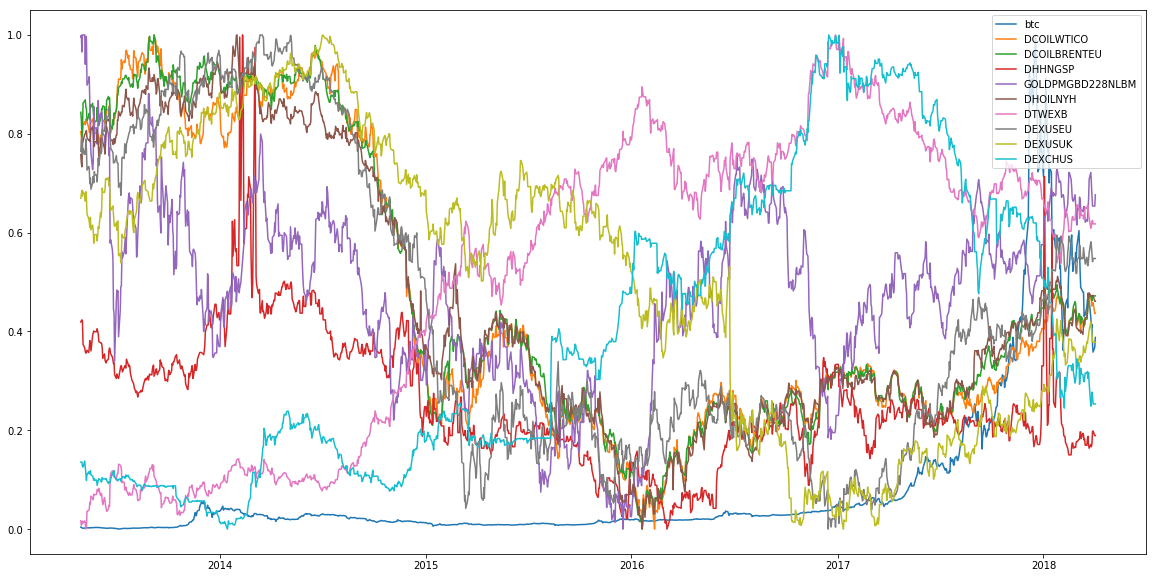

In [121]:
plt.figure(figsize=(20,10))
for i in range(0,10):
    plt.plot(q2['date'],q2[c[i]],label=c[i])

plt.legend()

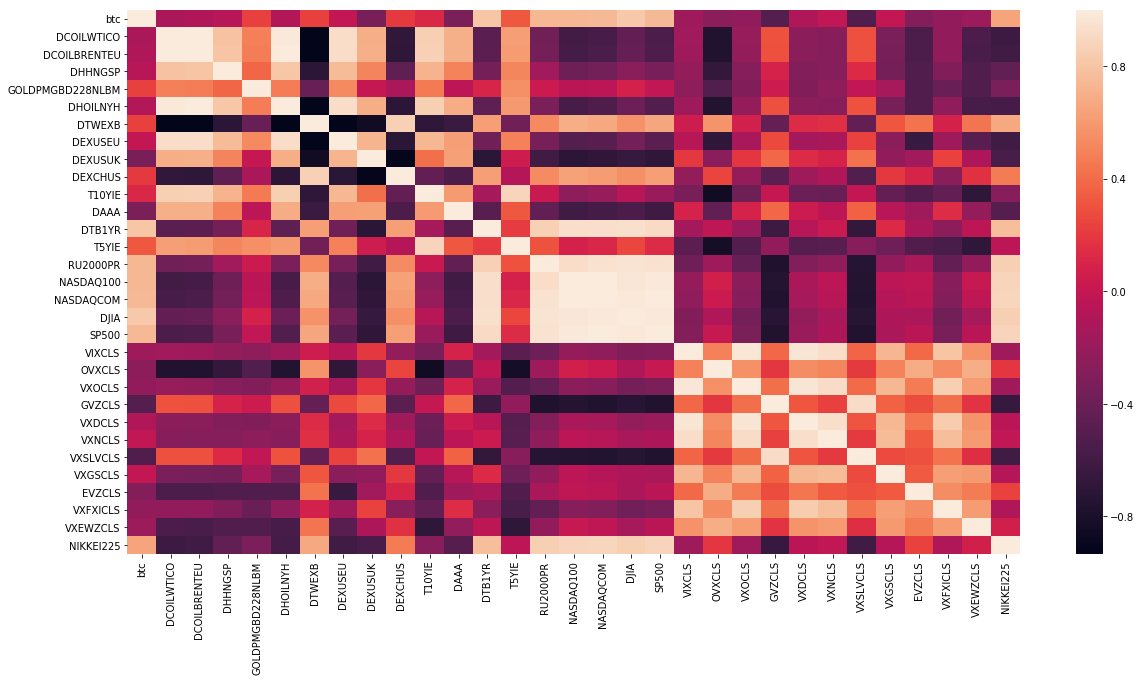

In [122]:
#Correlation Analysis
plt.figure(figsize=(20,10))
corr = q2[c].corr()
cor = cor
sns.heatmap(cor, xticklabels=cor.columns.values, yticklabels=cor.columns.values)

In [123]:
q2.columns

Index(['date', 'btc', 'DCOILWTICO', 'DCOILBRENTEU', 'DHHNGSP',
       'GOLDPMGBD228NLBM', 'DHOILNYH', 'DTWEXB', 'DEXUSEU', 'DEXUSUK',
       'DEXCHUS', 'T10YIE', 'DAAA', 'DTB1YR', 'T5YIE', 'RU2000PR', 'NASDAQ100',
       'NASDAQCOM', 'DJIA', 'SP500', 'VIXCLS', 'OVXCLS', 'VXOCLS', 'GVZCLS',
       'VXDCLS', 'VXNCLS', 'VXSLVCLS', 'VXGSCLS', 'EVZCLS', 'VXFXICLS',
       'VXEWZCLS', 'NIKKEI225', 'day'],
      dtype='object')

In [124]:
cor.loc[:,:] =  np.tril(cor, k=-1)
cor = cor.stack()
cor[abs(cor) > 0.95]
x = ['DCOILBRENTEU','DHOILNYH','NASDAQCOM','DJIA','RU2000PR','NASDAQ100','VXOCLS','VXDCLS','day']
q2.drop(x, axis=1, inplace=True)
q2.head()

,date,btc,DCOILWTICO,DHHNGSP,GOLDPMGBD228NLBM,DTWEXB,DEXUSEU,DEXUSUK,DEXCHUS,T10YIE,...,VIXCLS,OVXCLS,GVZCLS,VXNCLS,VXSLVCLS,VXGSCLS,EVZCLS,VXFXICLS,VXEWZCLS,NIKKEI225
0,2013-04-29,0.003996,0.804217,0.418919,0.995832,0.016821,0.764358,0.669507,0.135650,1.000000,...,0.144620,0.138669,0.570183,0.153493,0.604027,0.251153,0.384170,0.175710,0.042907,0.121201
1,2013-04-30,0.003705,0.793912,0.421922,0.999405,0.007926,0.786318,0.677828,0.135650,0.974790,...,0.138608,0.156197,0.525748,0.154105,0.565996,0.247982,0.385135,0.157931,0.035786,0.121201
2,2013-05-01,0.002550,0.764539,0.423423,0.965464,0.010158,0.793074,0.685556,0.135650,0.941176,...,0.169304,0.188925,0.560631,0.174326,0.640460,0.278835,0.389961,0.189102,0.053314,0.115934
3,2013-05-02,0.001931,0.799597,0.418919,1.000000,0.016008,0.757601,0.673866,0.126171,0.924370,...,0.140823,0.154956,0.524502,0.149510,0.548098,0.238466,0.391892,0.174786,0.048932,0.106917
4,2013-05-03,0.001539,0.817956,0.373874,1.000000,0.012311,0.770552,0.682584,0.125626,0.949580,...,0.117405,0.147510,0.454319,0.133272,0.495686,0.274510,0.318533,0.150543,0.039438,0.106917


btc        btc                 0.000000
           DCOILWTICO          0.000000
           DCOILBRENTEU        0.000000
           DHHNGSP             0.000000
           GOLDPMGBD228NLBM    0.000000
           DHOILNYH            0.000000
           DTWEXB              0.000000
           DEXUSEU             0.000000
           DEXUSUK             0.000000
           DEXCHUS             0.000000
           T10YIE              0.000000
           DAAA                0.000000
           DTB1YR              0.000000
           T5YIE               0.000000
           RU2000PR            0.000000
           NASDAQ100           0.000000
           NASDAQCOM           0.000000
           DJIA                0.000000
           SP500               0.000000
           VIXCLS              0.000000
           OVXCLS              0.000000
           VXOCLS              0.000000
           GVZCLS              0.000000
           VXDCLS              0.000000
           VXNCLS              0.000000


In [142]:
q3 = q2.drop(['date'],axis=1)
pca = PCA(n_components=3)
pca.fit(q3)
q3_pca = pca.transform(q3)
print("first two principal components explained variance ratio = %0.3f" % np.sum(pca.explained_variance_ratio_))
pca.explained_variance_
pca_df = pd.DataFrame(q3_pca, columns=["pca1", "pca2","pca3"])
pd.DataFrame(pca.components_)

first two principal components explained variance ratio = 0.815


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-0.063931,0.365214,0.128858,0.091685,-0.394949,0.378821,0.324704,-0.326375,0.216197,0.220150,...,-0.004228,-0.155288,0.099038,-0.024824,0.117301,-0.052486,-0.126363,-0.010321,-0.088526,-0.212709
1,-0.219373,-0.143887,-0.082859,-0.190006,0.011497,-0.149806,0.175768,-0.163209,-0.253006,0.041110,...,0.157676,0.282095,0.212124,0.125371,0.260636,0.123299,0.290427,0.220455,0.200956,-0.153799
2,0.322667,-0.069496,-0.044725,-0.188292,-0.078756,0.115817,0.369962,-0.474818,-0.016260,-0.003723,...,0.154715,0.046673,-0.158137,0.188682,-0.148790,0.003520,0.074811,0.202273,0.094265,0.407109


In [129]:
q3 = q2.drop(['date'],axis=1)
pca = PCA(n_components=3)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
print("first two principal components explained variance ratio = %0.3f" % np.sum(pca.explained_variance_ratio_))

pca_df = pd.DataFrame(q3_pca, columns=["pca1", "pca2","pca3"])
